# **Assignment 3 CNN - 160204107**

## **Libraries**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import random
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
import seaborn as sn

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## **Step-1 (Dataset Read)**

**Mount Drive**

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Dataset Read**

In [12]:
df = pd.read_csv('/content/drive/MyDrive/Soft Computing 4.2/Text Classification Dataset/Dataset 3.csv',encoding='ISO-8859-1')
df

,tweets,sentiment
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


## **Step-2 (Text Preprocessing)**
1. Punctuation Remove
2. Tokenization
3. Removing Stopwords
4. Lemmatization

### **Punctuation Remove**

In [13]:
def punc_remove(text):
  for i in text:
    if i in string.punctuation:
      text = text.replace(i," ")
  return text

df['Punc_Remove'] = df['tweets'].apply(lambda x: punc_remove(x))
df

,tweets,sentiment,Punc_Remove
0,just had a real good moment. i missssssssss hi...,0,just had a real good moment i missssssssss hi...
1,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http plurk com p mzp1e
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen http twitpic com 2y2lx http ...
3,@lapcat Need to send 'em to my accountant tomo...,0,lapcat Need to send em to my accountant tomo...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,ADD ME ON MYSPACE myspace com LookThunder
...,...,...,...
10309,No Depression by G Herbo is my mood from now o...,1,No Depression by G Herbo is my mood from now o...
10310,What do you do when depression succumbs the br...,1,What do you do when depression succumbs the br...
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1,Ketamine Nasal Spray Shows Promise Against Dep...
10312,dont mistake a bad day with depression! everyo...,1,dont mistake a bad day with depression everyo...


### **Tokenization**

In [14]:
def tokenization(text):
  for i in text:
    tokens = word_tokenize(text)
    words = [word for word in tokens if word.isalpha()]
  return words

df['Tokens'] = df['Punc_Remove'].apply(lambda x: tokenization(x.lower()))
df

,tweets,sentiment,Punc_Remove,Tokens
0,just had a real good moment. i missssssssss hi...,0,just had a real good moment i missssssssss hi...,"[just, had, a, real, good, moment, i, missssss..."
1,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http plurk com p mzp1e,"[is, reading, manga, http, plurk, com, p]"
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen http twitpic com 2y2lx http ...,"[comeagainjen, http, twitpic, com, http, www, ..."
3,@lapcat Need to send 'em to my accountant tomo...,0,lapcat Need to send em to my accountant tomo...,"[lapcat, need, to, send, em, to, my, accountan..."
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,ADD ME ON MYSPACE myspace com LookThunder,"[add, me, on, myspace, myspace, com, lookthunder]"
...,...,...,...,...
10309,No Depression by G Herbo is my mood from now o...,1,No Depression by G Herbo is my mood from now o...,"[no, depression, by, g, herbo, is, my, mood, f..."
10310,What do you do when depression succumbs the br...,1,What do you do when depression succumbs the br...,"[what, do, you, do, when, depression, succumbs..."
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1,Ketamine Nasal Spray Shows Promise Against Dep...,"[ketamine, nasal, spray, shows, promise, again..."
10312,dont mistake a bad day with depression! everyo...,1,dont mistake a bad day with depression everyo...,"[dont, mistake, a, bad, day, with, depression,..."


### **Removing Stopwords**

In [15]:
def stopWords(text):
  stop_words = set(stopwords.words('english'))
  for i in text:
    text = [w for w in text if not w in stop_words]
  return text

df['Stopwords_Remove'] = df['Tokens'].apply(lambda x: stopWords(x))
df

,tweets,sentiment,Punc_Remove,Tokens,Stopwords_Remove
0,just had a real good moment. i missssssssss hi...,0,just had a real good moment i missssssssss hi...,"[just, had, a, real, good, moment, i, missssss...","[real, good, moment, missssssssss, much]"
1,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http plurk com p mzp1e,"[is, reading, manga, http, plurk, com, p]","[reading, manga, http, plurk, com, p]"
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen http twitpic com 2y2lx http ...,"[comeagainjen, http, twitpic, com, http, www, ...","[comeagainjen, http, twitpic, com, http, www, ..."
3,@lapcat Need to send 'em to my accountant tomo...,0,lapcat Need to send em to my accountant tomo...,"[lapcat, need, to, send, em, to, my, accountan...","[lapcat, need, send, em, accountant, tomorrow,..."
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,ADD ME ON MYSPACE myspace com LookThunder,"[add, me, on, myspace, myspace, com, lookthunder]","[add, myspace, myspace, com, lookthunder]"
...,...,...,...,...,...
10309,No Depression by G Herbo is my mood from now o...,1,No Depression by G Herbo is my mood from now o...,"[no, depression, by, g, herbo, is, my, mood, f...","[depression, g, herbo, mood, done, stressing, ..."
10310,What do you do when depression succumbs the br...,1,What do you do when depression succumbs the br...,"[what, do, you, do, when, depression, succumbs...","[depression, succumbs, brain, makes, feel, lik..."
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1,Ketamine Nasal Spray Shows Promise Against Dep...,"[ketamine, nasal, spray, shows, promise, again...","[ketamine, nasal, spray, shows, promise, depre..."
10312,dont mistake a bad day with depression! everyo...,1,dont mistake a bad day with depression everyo...,"[dont, mistake, a, bad, day, with, depression,...","[dont, mistake, bad, day, depression, everyone..."


### **Lemmatization**

In [16]:
def lematization(text):
  lemmatizer = WordNetLemmatizer()
  for i in text:
    text = [lemmatizer.lemmatize(w) for w in text]
  return text

df['Lemmatization'] = df['Stopwords_Remove'].apply(lambda x: lematization(x))
df

,tweets,sentiment,Punc_Remove,Tokens,Stopwords_Remove,Lemmatization
0,just had a real good moment. i missssssssss hi...,0,just had a real good moment i missssssssss hi...,"[just, had, a, real, good, moment, i, missssss...","[real, good, moment, missssssssss, much]","[real, good, moment, miss, much]"
1,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http plurk com p mzp1e,"[is, reading, manga, http, plurk, com, p]","[reading, manga, http, plurk, com, p]","[reading, manga, http, plurk, com, p]"
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen http twitpic com 2y2lx http ...,"[comeagainjen, http, twitpic, com, http, www, ...","[comeagainjen, http, twitpic, com, http, www, ...","[comeagainjen, http, twitpic, com, http, www, ..."
3,@lapcat Need to send 'em to my accountant tomo...,0,lapcat Need to send em to my accountant tomo...,"[lapcat, need, to, send, em, to, my, accountan...","[lapcat, need, send, em, accountant, tomorrow,...","[lapcat, need, send, em, accountant, tomorrow,..."
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,ADD ME ON MYSPACE myspace com LookThunder,"[add, me, on, myspace, myspace, com, lookthunder]","[add, myspace, myspace, com, lookthunder]","[add, myspace, myspace, com, lookthunder]"
...,...,...,...,...,...,...
10309,No Depression by G Herbo is my mood from now o...,1,No Depression by G Herbo is my mood from now o...,"[no, depression, by, g, herbo, is, my, mood, f...","[depression, g, herbo, mood, done, stressing, ...","[depression, g, herbo, mood, done, stressing, ..."
10310,What do you do when depression succumbs the br...,1,What do you do when depression succumbs the br...,"[what, do, you, do, when, depression, succumbs...","[depression, succumbs, brain, makes, feel, lik...","[depression, succumbs, brain, make, feel, like..."
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1,Ketamine Nasal Spray Shows Promise Against Dep...,"[ketamine, nasal, spray, shows, promise, again...","[ketamine, nasal, spray, shows, promise, depre...","[ketamine, nasal, spray, show, promise, depres..."
10312,dont mistake a bad day with depression! everyo...,1,dont mistake a bad day with depression everyo...,"[dont, mistake, a, bad, day, with, depression,...","[dont, mistake, bad, day, depression, everyone...","[dont, mistake, bad, day, depression, everyone..."


## **Step-3 (Train, Test, Validation Prepare)**

In [17]:
df_Train, df_Test = train_test_split(df,train_size=0.8,test_size=0.2,random_state=107)

df_Train = df_Train.sort_index(ascending=True)
df_Test = df_Test.sort_index(ascending=True)

print('Total Data: ', len(df))
print('Train Data: ', len(df_Train))
print('Test Data: ', len(df_Test))

Total Data:  10314
Train Data:  8251
Test Data:  2063


**Tweets and Sentiment labels**

In [18]:
def get_tweet(data):
  tweets = [x for x in data.Lemmatization]
  labels = [x for x in data.sentiment]
  return tweets, labels

tweetsTrain, labelsTrain = get_tweet(df_Train)
tweetsTest, labelsTest = get_tweet(df_Test)

## **Step-4 (Tokenizing the Tweets into Number Sequences)**

In [19]:
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(df_Train.Lemmatization)

print(tokenizer.texts_to_sequences([df_Train.Lemmatization[0]]))
print(df_Train.Lemmatization[1])

[[127, 5, 473, 180, 38]]
['reading', 'manga', 'http', 'plurk', 'com', 'p']


## **Task 5: Padding and Truncating Sequences**

In [20]:
maxlen = 60
def get_sequences(tokenizer, Lemmatization):
  sequences = tokenizer.texts_to_sequences(Lemmatization)
  padded = pad_sequences(sequences, truncating='post', padding='post', maxlen=maxlen)
  return padded

padded_Train_seq = get_sequences(tokenizer, df_Train.Lemmatization)
padded_Test_seq = get_sequences(tokenizer, df_Test.Lemmatization)

## **Step-6 (CNN Model)**

In [21]:
X_Train = padded_Train_seq.tolist()
Y_Train = labelsTrain
X_Test = padded_Test_seq.tolist()
Y_Test = labelsTest

**CNN Model Creation & Compilation**

In [22]:
model = tf.keras.models.Sequential([
                  tf.keras.layers.Embedding(10000, 16, input_length=maxlen),

                  tf.keras.layers.Conv1D(64, 3, activation='relu'),                 
                  tf.keras.layers.MaxPooling1D(),

                  tf.keras.layers.Conv1D(32, 3, activation='relu'),                 
                  tf.keras.layers.MaxPooling1D(),

                  tf.keras.layers.Conv1D(16, 3, activation='relu'),                 
                  tf.keras.layers.GlobalMaxPooling1D(),
                                  
                  tf.keras.layers.Dense(10, activation='relu'),
                  tf.keras.layers.Dense(1, activation='sigmoid'),                                
])

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 60, 16)            160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 58, 64)            3136      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 29, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 27, 32)            6176      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 13, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 11, 16)            1552      
_________________________________________________________________
global_max_pooling1d (Global (None, 16)                0

**Model Fit**

In [23]:
h = model.fit(X_Train, Y_Train,
                    epochs=5,
                    verbose=True,
                    validation_data=(X_Test, Y_Test),
                    batch_size=10)

Epoch 1/5
826/826 [==============================] - 6s 7ms/step - loss: 0.1517 - accuracy: 0.9435 - val_loss: 0.0169 - val_accuracy: 0.9961
Epoch 2/5
826/826 [==============================] - 5s 6ms/step - loss: 0.0152 - accuracy: 0.9973 - val_loss: 0.0138 - val_accuracy: 0.9981
Epoch 3/5
826/826 [==============================] - 5s 6ms/step - loss: 0.0119 - accuracy: 0.9981 - val_loss: 0.0196 - val_accuracy: 0.9947
Epoch 4/5
826/826 [==============================] - 5s 6ms/step - loss: 0.0102 - accuracy: 0.9985 - val_loss: 0.0134 - val_accuracy: 0.9956
Epoch 5/5
826/826 [==============================] - 5s 6ms/step - loss: 0.0100 - accuracy: 0.9987 - val_loss: 0.0145 - val_accuracy: 0.9966


**Train And Test Accuracy Check**

In [24]:
loss, accuracy = model.evaluate(X_Train, Y_Train, verbose=True)
print("Train Accuracy: {:.3f}".format(accuracy))
loss, accuracy = model.evaluate(X_Test, Y_Test, verbose=False)
print("Test Accuracy:  {:.3f}".format(accuracy))

258/258 [==============================] - 1s 3ms/step - loss: 0.0082 - accuracy: 0.9988
Train Accuracy: 0.999
Test Accuracy:  0.997


**Loss and Accuracy Curve**

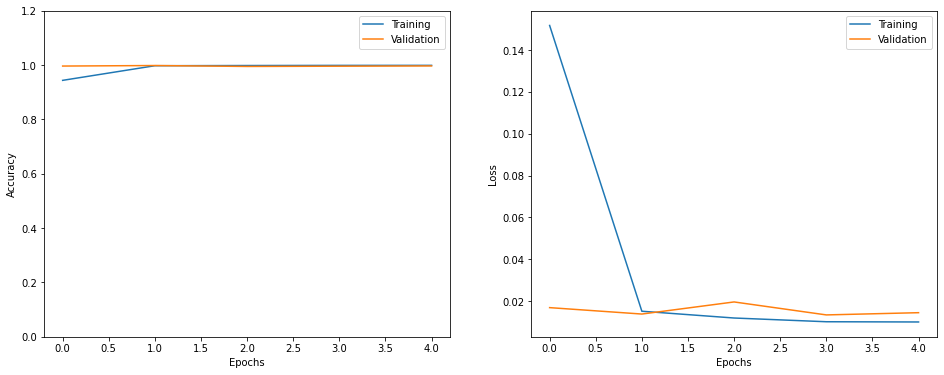

In [25]:
def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.2])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

show_history(h)

## **Step-7 (Prediction)**

In [29]:
Pred=model.predict(X_Test) 
Y_Pred = [int(np.round(x)[0]) for x in Pred]
print('Tweet: ', df_Test.tweets[3])
print('Sentiment: ', df_Test.sentiment[3])
print('Predicted Sentiment: ', Y_Pred[3])

Tweet:  @lapcat Need to send 'em to my accountant tomorrow. Oddly, I wasn't even referring to my taxes. Those are supporting evidence, though. 
Sentiment:  0
Predicted Sentiment:  0


## **Step-8 (Accuracy, Precision, Recall, F1-Score)**

1.   **Accuracy** = $\frac{\text{TP+TN}}{\text{TP+TN+FP+FN}}$
2.   **Precision** = $\frac{\text{TP}}{\text{TP+FP}}$ 
3.   **Recall** = $\frac{\text{TP}}{\text{TP+FN}}$ 
4.   **F1-score** = $\frac{\text{2*Precision*Recall}}{\text{Precision+Recall}}$ 

In [30]:
print('--------------------Classification Report--------------------')
print()
print(classification_report(Y_Test,Y_Pred))

--------------------Classification Report--------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1583
           1       0.99      0.99      0.99       480

    accuracy                           1.00      2063
   macro avg       1.00      0.99      1.00      2063
weighted avg       1.00      1.00      1.00      2063



## **Step-9 (Confusion Matrix)**

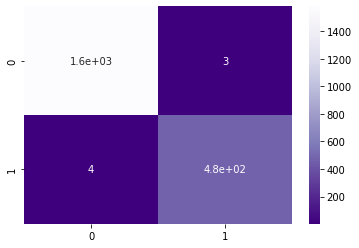

In [31]:
conf=confusion_matrix(Y_Test,Y_Pred)
conf
sn.heatmap(conf, cmap="Purples_r", annot=True)